## Save Trained Model

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# Input Data with some Noise
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [3]:
x_data

array([-1.25553565, -0.10738738,  2.62115821,  1.91035981,  5.24112128,
        6.97133505,  5.53814976,  7.67907527,  7.86096919,  8.62041738])

In [4]:
# Input Labels with Noise
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [5]:
y_label

array([-1.09537357,  0.26976108,  3.33485559,  3.91200454,  5.36288259,
        6.36974435,  7.87967793,  7.57185236,  8.34625047, 11.40506651])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

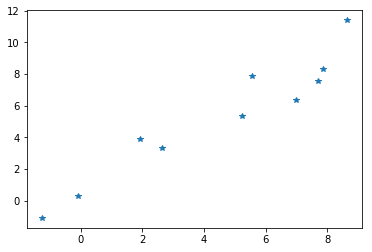

In [7]:
plt.plot(x_data,y_label,'*')

y = mx + b

In [8]:
np.random.rand(2)

array([0.12917954, 0.43911969])

In [9]:
# Weight
m = tf.Variable(0.94)

# Bias
b = tf.Variable(0.47)

In [10]:
# Cost Function
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    
    # Squared Error
    error += (y - y_hat)**2
    print('Error: ',error)

Error:  Tensor("add_1:0", shape=(), dtype=float32)
Error:  Tensor("add_3:0", shape=(), dtype=float32)
Error:  Tensor("add_5:0", shape=(), dtype=float32)
Error:  Tensor("add_7:0", shape=(), dtype=float32)
Error:  Tensor("add_9:0", shape=(), dtype=float32)
Error:  Tensor("add_11:0", shape=(), dtype=float32)
Error:  Tensor("add_13:0", shape=(), dtype=float32)
Error:  Tensor("add_15:0", shape=(), dtype=float32)
Error:  Tensor("add_17:0", shape=(), dtype=float32)
Error:  Tensor("add_19:0", shape=(), dtype=float32)


In [11]:
# Optimizer
# Define the Gradient Descent Optimizer with a Learning Rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# Optimizer has to try to Minimize the Squared Error
train = optimizer.minimize(error)

In [12]:
init = tf.global_variables_initializer()

In [13]:
# Define a Model Saver
save_model = tf.train.Saver()

In [14]:
# Create a Tensorflow Session
with tf.Session() as sess:
    # Run Variables Initializer
    sess.run(init)
    
    # Define Number of Training Steps
    training_steps = 5
    
    # Run the Gradient Descent Optimizer for Training Steps
    for i in range(training_steps):
        sess.run(train)
        
    # Fetch the final value of "Weight" and "Bias"
    final_slope, final_intercept = sess.run([m,b])
    
    # Save the Trained Model
    save_model.save(sess, './saved_model/simple_regression_model.ckpt')

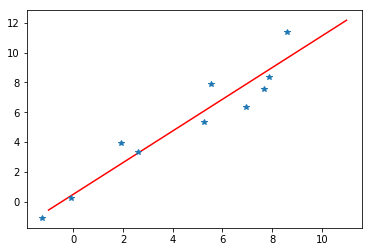

In [15]:
x_test = np.linspace(-1,11,10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

## Load Trained Model

In [16]:
with tf.Session() as sess:
    
    # Load Model
    save_model.restore(sess, './saved_model/simple_regression_model.ckpt')
    
     # Fetch the Stored value of "Weight" and "Bias"
    restored_slope, restored_intercept = sess.run([m,b])

INFO:tensorflow:Restoring parameters from ./saved_model/simple_regression_model.ckpt


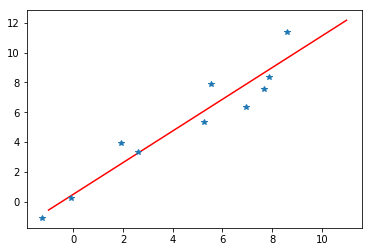

In [17]:
x_test = np.linspace(-1,11,10)

y_pred_plot = restored_slope*x_test + restored_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')